# Modelado inverso de ERT

## Caso 1

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pygimli as pg
from pygimli.physics import ert

In [5]:
data1 = ert.load('datos_tre/Datos_reales_1.dat')

In [ ]:
print(data1)

Data: Sensors: 32 data: 456, nonzero entries: ['a', 'b', 'm', 'n', 'rhoa', 'valid']


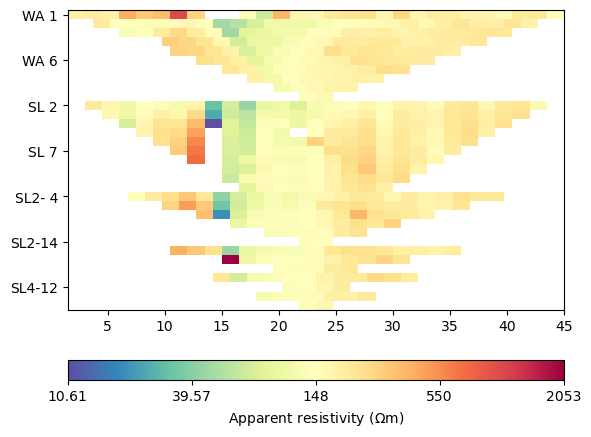

In [ ]:
ax, cb = ert.show(data1)

In [6]:
data1["k"] = ert.geometricFactors(data1)

In [ ]:
data1["k"]

456 [9.424777960769381,...,94.2477796076938]

In [7]:
data1["err"]=ert.estimateError(data1, relativeError=0.02, absoluteError=50e-6)

In [ ]:
data1["err"]

456 [0.020000260362424496,...,0.020000301259263723]

In [2]:
import seaborn as sns

<Axes: ylabel='Count'>

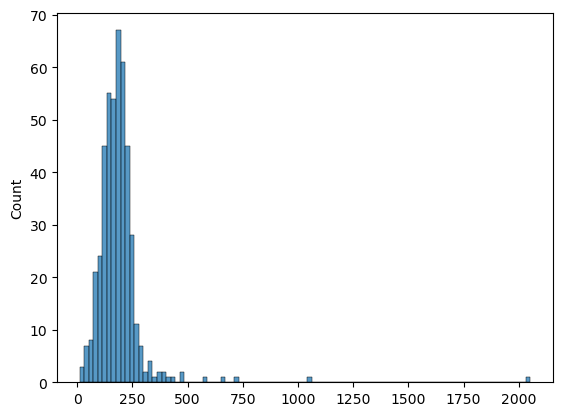

In [10]:
sns.histplot(data1["rhoa"])

In [13]:
data1_array = np.array(data1["rhoa"])

In [15]:
import pandas as pd
data1_series = pd.Series(data1_array)

In [18]:
data1_series.quantile([0.99]) #percentil 99 de resistividad aparente

0.99    525.8655
dtype: float64

In [20]:
data1.remove(data1["rhoa"]>1000) #Con esto puedo remover los valores de rhoa mayores a 1000

In [21]:
mgr1 = ert.ERTManager(data1, verbose=True)

In [22]:
inv1 = mgr1.invert(verbose=True)

07/02/24 - 22:45:50 - pyGIMLi - INFO - Found 2 regions.
07/02/24 - 22:45:50 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
07/02/24 - 22:45:50 - pyGIMLi - INFO - Found 2 regions.
07/02/24 - 22:45:50 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
07/02/24 - 22:45:50 - pyGIMLi - INFO - Creating forward mesh from region infos.
07/02/24 - 22:45:50 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
07/02/24 - 22:45:50 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 1523 Cells: 2848 Boundaries: 2234
07/02/24 - 22:45:51 - pyGIMLi - INFO - Use median(data values)=179.675
07/02/24 - 22:45:51 - pyGIMLi - INFO - Created startmodel from forward operator: 492, min/max=179.675000/179.675000
07/02/24 - 22:45:51 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000002B0526C4900>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000002B0526C49F0>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x000002B0526C48B0>
min/max (data): 10.61/732
min/max (error): 2%/2%
min/max (start model): 180/180
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  512.94
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  127.25 (dPhi = 73.90%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =   50.40 (dPhi = 58.00%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =   23.68 (dPhi = 44.60%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² =   21.23 (dPhi = 8.00%) lam: 20.0
-------------------

In [23]:
inv1

492 [1880.7646762848653,...,128.8072761959532]

<Axes: ylabel='Count'>

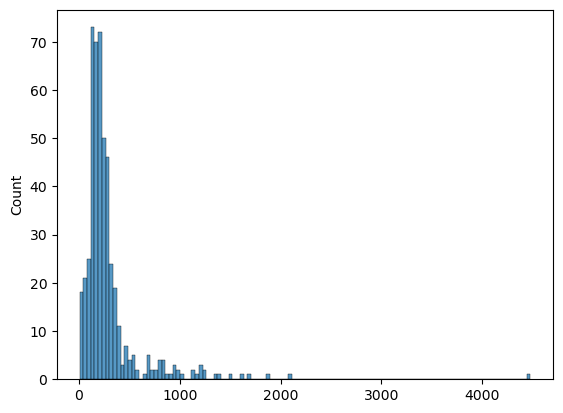

In [35]:
sns.histplot(inv1) #Distribución de resistividades

In [28]:
array_inv1 = np.array(inv1) #convierto el Rvector de inversión en array
series_inv1 = pd.Series(array_inv1) #Convierto el array en series

In [30]:
inv_outliers = series_inv1.quantile([0.99]) #percentil 99 de resistividad invertida

In [31]:
inv_outliers

0.99    1529.003368
dtype: float64

(-10.0, 0.0)

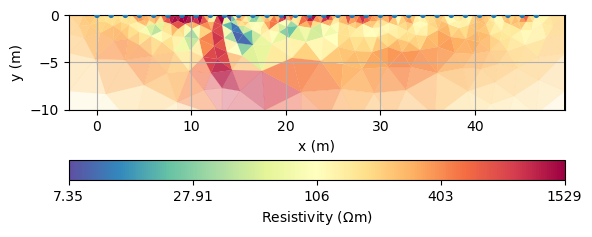

In [37]:
kw = dict(logScale=True, cMap="Spectral_r", xlabel="x (m)", ylabel="y (m)", cMin=0, cMax=1529) #cMin y cMax son los valores mínimos y máximos de la barra de colores
ax, cb = mgr1.showResult(**kw)
ax.grid(True)
ax.set_ylim([-10, ax.get_ylim()[1]]) #esto es para que el eje y empiece en -10